# Обобщенный псевдокод алгоритма построения дерева:

<pre style="margin: 0; line-height: 125%;" class="hljs language-php"><span class="hljs-function"><span class="hljs-keyword">function</span> <span class="hljs-title">decision_tree</span>(<span class="hljs-params">X, y</span>):
    <span class="hljs-title">if</span> <span class="hljs-title">stopping_criterion</span>(<span class="hljs-params">X, y</span>) == <span class="hljs-title">True</span>:
        <span class="hljs-title">S</span> = <span class="hljs-title">create_leaf_with_prediction</span>(<span class="hljs-params">y</span>)
    <span class="hljs-title">else</span>:
        <span class="hljs-title">S</span> = <span class="hljs-title">create_node</span>(<span class="hljs-params"></span>)
        (<span class="hljs-params">X_1, y_1</span>) .. (<span class="hljs-params">X_L, y_L</span>) = <span class="hljs-title">best_split</span>(<span class="hljs-params">X, y</span>)
        <span class="hljs-title">for</span> <span class="hljs-title">i</span> <span class="hljs-title">in</span> 1..<span class="hljs-title">L</span>:
            <span class="hljs-title">C</span> = <span class="hljs-title">decision_tree</span>(<span class="hljs-params">X_i, y_i</span>)
            <span class="hljs-title">connect_nodes</span>(<span class="hljs-params">S, C</span>)
    <span class="hljs-title">return</span> <span class="hljs-title">S</span>
</span></pre>

Решающие деревья для задачи классификации

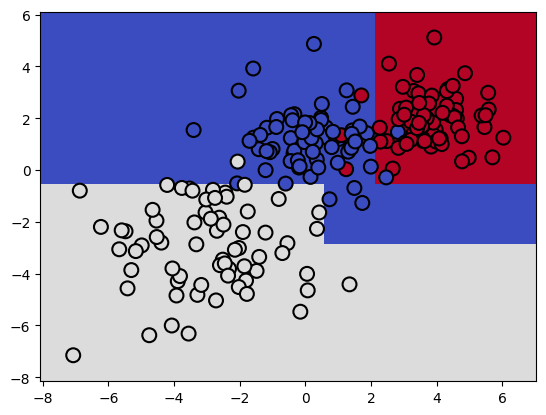

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)],
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(),
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

Решающие деревья в задаче регрессии

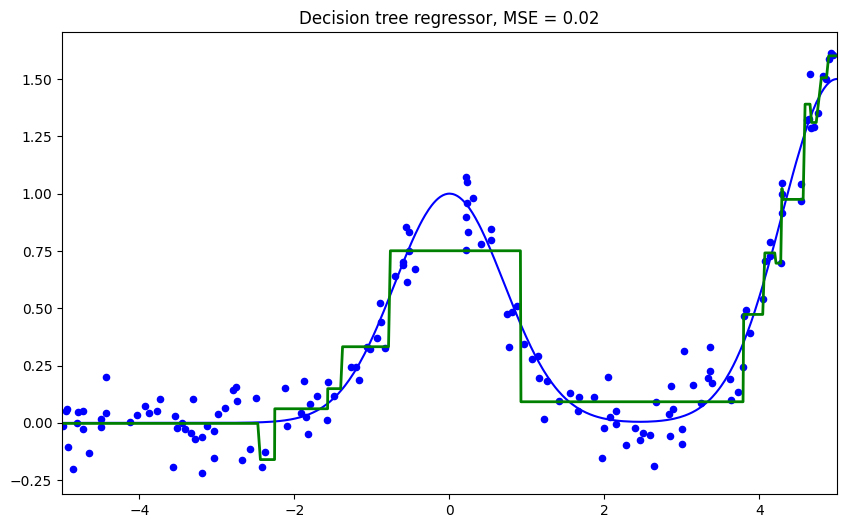

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.mean((y_test - reg_tree_pred) ** 2))
plt.show()